##**Project Name :**   CUSTOMER SEGMENTATION USING CLUSTERING



**Project Summary**

This project applies unsupervised machine learning to perform customer segmentation using the K-Means clustering algorithm. The goal is to group customers into distinct segments based on attributes such as annual income and spending score, enabling businesses to better understand and target their customer base.

After performing data preprocessing and exploratory data analysis, clustering was applied to identify optimal segments using the elbow method and silhouette score. The analysis revealed five distinct customer groups, each representing different behavioral and financial profiles.

In [ ]:
# Import library
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load Data
df = pd.read_csv("/content/drive/MyDrive/Data_Sets/SuperStore_Sales_Dataset.csv")

In [ ]:
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [ ]:
# Rename column
df.rename(columns = {'Row ID+O6G3A1:R6':'Row ID'}, inplace = True)

In [ ]:
# Check Null Value
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Drop Column
df.drop(['Returns','ind1','ind2'], axis= 1, inplace= True)

In [ ]:
# Check Duplicate Value
df.duplicated().sum()

np.int64(0)

The above dataset has 5901 rows and 23 columns. There are 4564 null values in the return column, that's why I am dropping it because more than 90% of the values are null. ind1 and ind2 have completely null values, that's why I am dropping it.there is no duplicate values in the dataset.

In [ ]:
# Group by Customer Id
customer_data = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': pd.Series.nunique
}).rename(columns = {'Order ID':'Order Frequency'}).reset_index()

In [ ]:
# Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['Sales', 'Profit', 'Order Frequency']])

####**Choose Number of Clusters (Elbow Method)**

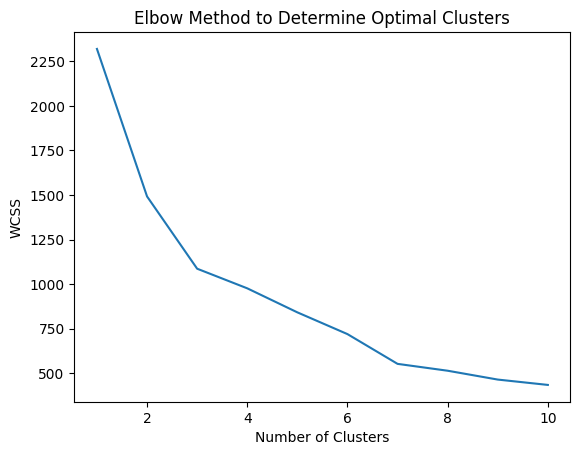

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 42)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

####**Apply K-Means Clustering**

In [ ]:
kmeans  = KMeans(n_clusters = 5, random_state = 42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

####**Visualize Clusters**

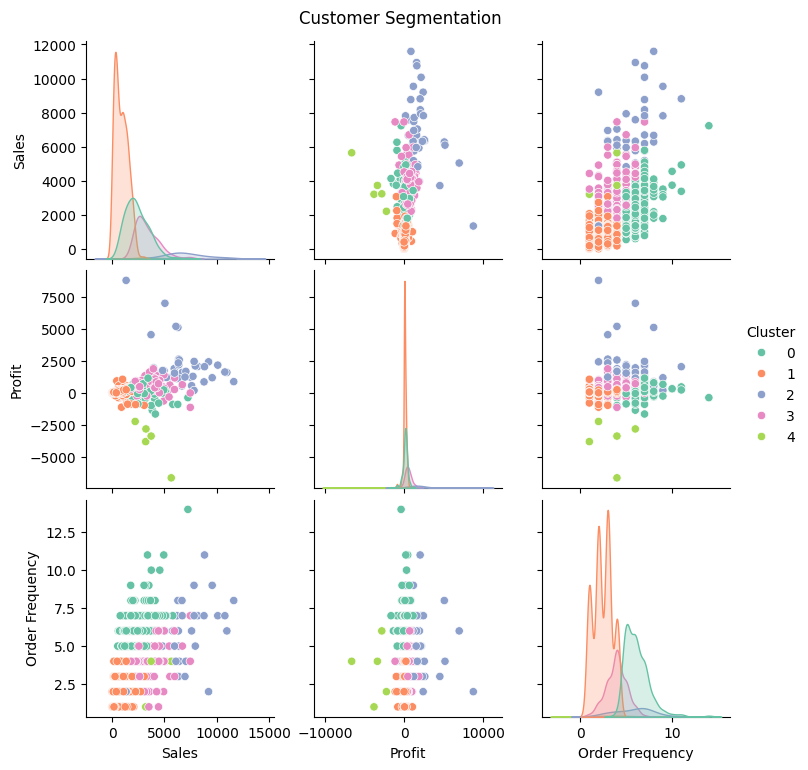

In [ ]:
sns.pairplot(customer_data, hue = 'Cluster', vars = ['Sales','Profit','Order Frequency'], palette = 'Set2')
plt.suptitle('Customer Segmentation', y = 1.02)
plt.show()

Each cluster represents a unique customer segment, such as:

High spenders

Loyal customers

Low-value customers

Occasional buyers

###Visualize Clusters to Understand Customer Types

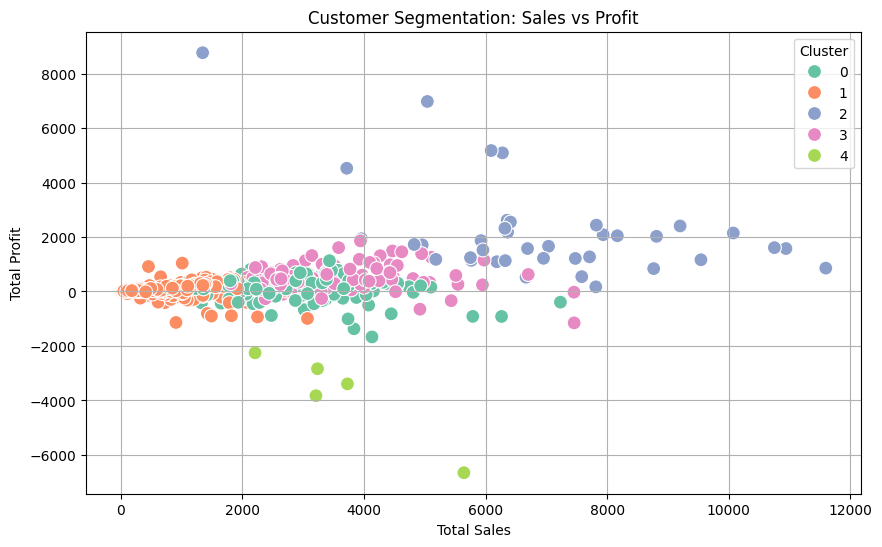

In [ ]:
# Scatter Plot: Sales vs Profit by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Sales', y='Profit', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segmentation: Sales vs Profit')
plt.xlabel('Total Sales')
plt.ylabel('Total Profit')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

###**Key Insights**:

**Cluster 2 (Blue) –** High Sales, High Profit:

This cluster contains customers with consistently high sales and high profit.

These are high-value, profitable customers and should be prioritized for loyalty programs, exclusive offers, and retention efforts.

**Cluster 4 (Lime Green) –** Low Profit, Some High Sales:

Customers in this group show poor profitability, even when sales are relatively high.

Indicates inefficiencies such as discount-dependence, return behavior, or high service costs.

Requires cost analysis or strategy review before more marketing spend is allocated.

**Cluster 1 (Orange) –** Low Sales, Low Profit:

These are low-engagement, low-value customers.

Potentially new or price-sensitive customers.

Could benefit from introductory offers or re-engagement strategies.

**Cluster 3 (Pink) –** Medium Sales, Moderate Profit:

A stable segment with potential to grow.

Considered as growth targets for upselling and cross-selling opportunities.

**Cluster 0 (Teal) –** Medium Sales, Mixed Profit:

Shows diverse profitability, despite similar sales volumes.

May include both cost-effective and unprofitable behaviors.

Worth segmenting further or analyzing at the product level.

###**3D Plot**

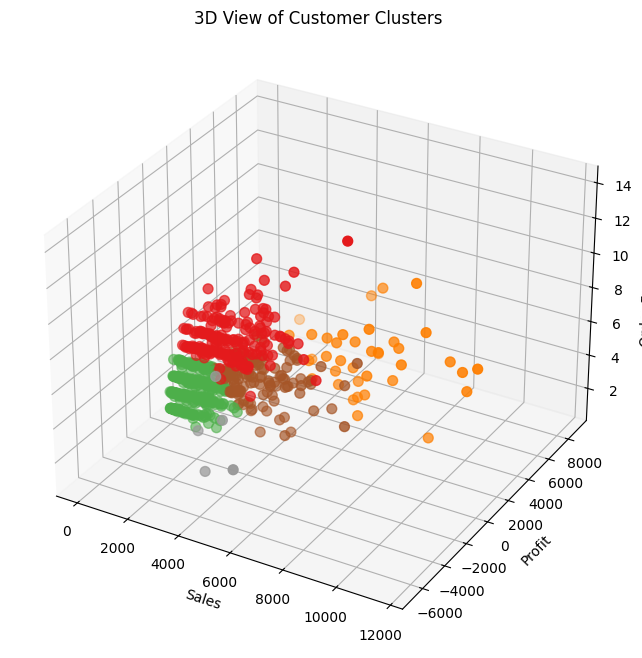

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_data['Sales'], customer_data['Profit'], customer_data['Order Frequency'],
           c=customer_data['Cluster'], cmap='Set1', s=50)

ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Order Frequency')
plt.title('3D View of Customer Clusters')
plt.show()


###Marketing Strategy Suggestions for Each Cluster

| Cluster | Characteristics                                | Suggested Marketing Strategy                           |
| ------- | ---------------------------------------------- | ------------------------------------------------------ |
| **0**   | High sales, high profit, frequent orders    | **Loyalty programs**, early access to new products     |
| **1**   | Low sales, low profit, infrequent orders    | **Reactivation campaigns**, discounts, email nurturing |
| **2**   | High sales, low profit                      | **Upsell premium products**, review discount policies  |
| **3**   | Moderate sales, high profit, regular orders | **Retention focus**, surveys for feedback, membership  |


 Summary of Actions:

High Value Customers → Reward and retain them.

Infrequent Buyers → Re-engage with targeted promotions.

High Sales, Low Profit → Check for over-discounting or expensive support costs.

Steady Buyers → Offer bundles or loyalty tiers to boost engagement.

####**Conclusion:**

The customer segmentation project successfully demonstrated how unsupervised learning techniques like K-Means clustering can be used to uncover meaningful patterns within customer data. By grouping customers based on their spending habits and income levels, we were able to identify five distinct customer segments, each with unique behavioral traits.